In [ ]:
# 순차데이터
# 1. 텍스트  i am a boy
# 2. 시계열.. 1일 15도  , 2일 17도

# 순환신경망... (RNN)
# 순환신경망에서 데이터를 처리하는 한 단계를 타임스텝.. 층을 셀
# 타임스텝프 A에서 셀의 출력 Oa 가 사라지지 않고 다음 스텝프 B에서 셀의 출력 Ob가 다시 타임스텝 C의 셀로 주입
# tanh - 하이볼릭 탄젠트... 
# IMDB 리뷰 데이터셋을 

In [ ]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb

In [21]:
(x_tr,y_tr),(x_ta,y_ta) = imdb.load_data(num_words=500)
x_tr.shape,y_tr.shape,x_ta.shape,y_ta.shape

((25000,), (25000,), (25000,), (25000,))

In [22]:
# 토근의 갯수 확인하기
# 문장에서 분리된 단어를 토큰
# 하나의 토큰이 하나의 타임스템프
# Sentence: i love you  token :'i','love,'you'   
# 한글은... 조사가 있어서. 공백으로 분리 안됨... 형태소 분석을 통해서 토큰분리하고... 라이브러 존재
len(x_tr[0]), len(x_tr[1])

(218, 189)

In [23]:
print(x_tr[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [13]:
!pip install numpy

In [24]:
import numpy as np
np.unique(y_tr)

array([0, 1], dtype=int64)

In [16]:
# 학습데이터와 훈련 데이터를 나눈다.

In [17]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=9f27ac4d748b4d419a56ae8c0664da08d195692da594b7677e6b9592ffb8853c
  Stored in directory: c:\users\이규영\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((20000,), (20000,))

In [39]:
lengths = np.array([len(i) for i in x_train])

In [31]:
!pip install matplotlib

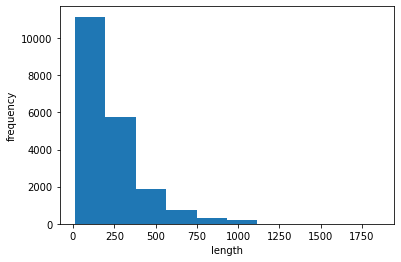

In [41]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [42]:
# pad_sequences() 시퀀스 데이터의 길이를 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
# 최대 단어의(토큰) 개수... 문장의 길이가..... 
x_train_seq = pad_sequences(x_train, maxlen=100)
x_target_seq = pad_sequences(x_target, maxlen=100)

In [44]:
x_train_seq.shape , x_target_seq.shape

((20000, 100), (5000, 100))

In [50]:
len(x_train_seq[0])

100

In [51]:
# 케라스는 순환신경알고리즘 ... 그 중에 가장 간단한 SimpleRNN 클래스를 사용
# input_shape = (100,500)  

In [54]:
from tensorflow import keras
model =  keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # 100은 각 샘플의 길이, 500은 빈도수가 높은 단어의 개수
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진 분류

In [70]:
x_train_seq.shape

(20000, 100)

In [69]:
# 토큰을 정수로 변환한 데이터를 사용.... -> 신경망에 주입.. 단지 숫자로 변환한것에 불과하기 때문에..
# 값이 커서 가중치가 커지는 것을 방지하기 위해.. 그리고 숫자사이의 관계를 없애기 위해서... on-hot-encoding을 사용한다.
print(x_train_seq[0])
x_train_oh= keras.utils.to_categorical(x_train_seq)
print(x_train_oh[:2])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]]


In [57]:
x_target_oh= keras.utils.to_categorical(x_target_seq)

In [58]:
x_train_oh.shape, x_target_oh.shape

((20000, 100, 500), (5000, 100, 500))

In [71]:
np.sum(x_train_oh[100][0])

1.0

In [73]:
rmsprop =  keras.optimizers.RMSprop(learning_rate=1e-4) #0.0001  
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train_oh, y_train, epochs=20, batch_size=64, validation_data=(x_target_oh,y_target), 
          callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
313/313 [==============================] - 10s 29ms/step - loss: 0.6874 - accuracy: 0.5477 - val_loss: 0.6920 - val_accuracy: 0.5178
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 0.6863 - accuracy: 0.5529 - val_loss: 0.6919 - val_accuracy: 0.5206
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6852 - accuracy: 0.5586 - val_loss: 0.6920 - val_accuracy: 0.5216
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6841 - accuracy: 0.5595 - val_loss: 0.6918 - val_accuracy: 0.5224
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 0.6829 - accuracy: 0.5644 - val_loss: 0.6915 - val_accuracy: 0.5248
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6817 - accuracy: 0.5691 - val_loss: 0.6912 - val_accuracy: 0.5288
Epoch 7/20
313/313 [==============================] - 7s 22ms/step - loss: 0.6800 - accuracy: 0.5738 - val_loss: 0.6902 - val_accuracy: 0.531